# Scraping data from : https://mawdoo3.com/تصنيف:علماء

In [1]:
import requests
from bs4 import BeautifulSoup
import json

# URL to scrape
url = 'https://mawdoo3.com/%D8%AA%D8%B5%D9%86%D9%8A%D9%81:%D8%B9%D9%84%D9%85%D8%A7%D8%A1'

# Send a GET request to the URL
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the specific div with class "tab active"
tab_active_div = soup.find('div', class_='tab active')

# Within this div, find the ul with id "grid"
grid_ul = tab_active_div.find('ul', id='grid')

# Within this ul, find all li elements with class "columns large-4 medium-3 small-6"
li_elements = grid_ul.find_all('li', class_='columns large-4 medium-3 small-6')

# Extract the links from the a tags with class "category-box"
base_url = 'https://mawdoo3.com'
links = []
for li in li_elements:
    a_tag = li.find('a', class_='category-box')
    if a_tag:
        links.append(base_url + a_tag['href'])

# Function to extract titles and paragraphs from a page
def extract_titles_and_paragraphs(page_url):
    response = requests.get(page_url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the specific div with id "mw-content-text"
    content_div = soup.find('div', class_='article-text').find('div', id='mw-content-text')
    
    # Extract titles (assuming h1, h2, h3, etc. are titles)
    titles = [title.get_text() for title in content_div.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])]
    
    # Extract paragraphs
    paragraphs = [para.get_text() for para in content_div.find_all('p')]
    
    return titles, paragraphs

# Data structure to hold all articles
articles_data = []

# Iterate over each link and extract titles and paragraphs
for link in links:
    titles, paragraphs = extract_titles_and_paragraphs(link)
    article_text = "\n".join(titles + paragraphs)  # Combine titles and paragraphs into a single text
    articles_data.append({
        'url': link,
        'text': article_text
    })

# Save the data to a JSON file
with open('articles.json', 'w', encoding='utf-8') as f:
    json.dump(articles_data, f, ensure_ascii=False, indent=4)

print("Data has been saved to articles.json")

Data has been saved to articles.json


In [2]:
import json
import csv
import random

# Load the JSON data
with open('articles.json', 'r', encoding='utf-8') as f:
    articles_data = json.load(f)

# Prepare data for CSV
csv_data = []
for article in articles_data:
    # Extract the text content
    text = article['text']
    # Assign a random score between 0 and 10
    score = round(random.uniform(0, 10), 1)  # Rounded to one decimal place
    csv_data.append([text, score])

# Save to CSV
with open('articles.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Text', 'Score'])  # Write the header
    writer.writerows(csv_data)  # Write the data

print("Data has been saved to articles.csv")

Data has been saved to articles.csv


In [1]:
import pandas as pd

df = pd.read_csv("articles.csv")

df

,Text,Score
0,محتويات\nابن سينا\nحياته\nإنجازاته في مجال الط...,1.7
1,محتويات\nأشهر العلماء المسلمين\nالخوارزمي\nابن...,3.6
2,محتويات\nمحمد بن موسى الخوارزمي\nنشأة وتعليم ا...,1.4
3,محتويات\nابن خلدون\nنشأة ابن خلدون\nحياته السي...,4.4
4,محتويات\nأينشتاين\nحياة أينشتاين ودراسته\nإنجا...,2.6
...,...,...
259,محتويات\nمولد والنشأة\nالدراسة\nالوظائف والمسؤ...,0.2
260,محتويات\nإسهامات العلماء المسلمين في مختلف الع...,5.3
261,محتويات\nأسماء العلماء المسلمين من غير العرب\n...,2.0
262,محتويات\nمن هم الأخوان رايت؟\nحياة الأخوين راي...,7.4


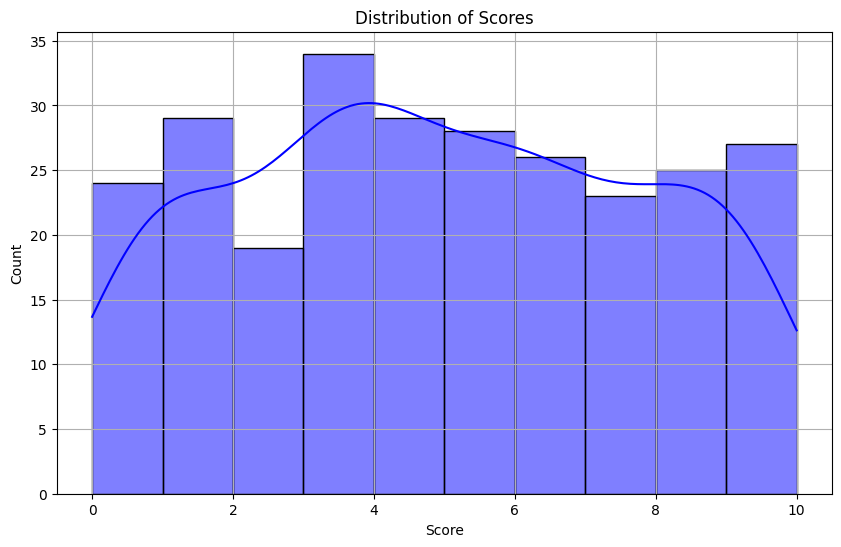

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# NLP pipeline

In [21]:
import re
import string
import numpy as np
import nltk
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, GRU, LSTM, Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
# Function to clean text
def clean_text(text):
    # Remove punctuation and special characters from the original text
    text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text)  # Include Arabic Unicode range \u0600-\u06FF
    # Remove digits from the cleaned text
    text = re.sub(r'\d+', '', text)
    # Remove line breaks from the cleaned text
    text = text.replace('\n', '. ')
    return text.strip()

In [4]:
# Clean the 'Text' column
df['Text'] = df['Text'].apply(clean_text)
df

,Text,Score
0,محتويات. ابن سينا. حياته. إنجازاته في مجال الط...,1.7
1,محتويات. أشهر العلماء المسلمين. الخوارزمي. ابن...,3.6
2,محتويات. محمد بن موسى الخوارزمي. نشأة وتعليم ا...,1.4
3,محتويات. ابن خلدون. نشأة ابن خلدون. حياته السي...,4.4
4,محتويات. أينشتاين. حياة أينشتاين ودراسته. إنجا...,2.6
...,...,...
259,محتويات. مولد والنشأة. الدراسة. الوظائف والمسؤ...,0.2
260,محتويات. إسهامات العلماء المسلمين في مختلف الع...,5.3
261,محتويات. أسماء العلماء المسلمين من غير العرب. ...,2.0
262,محتويات. من هم الأخوان رايت؟. حياة الأخوين راي...,7.4


In [5]:
# Initialize the Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Text'])


In [7]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['Text'])

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences)  # Find the maximum sequence length
data = pad_sequences(sequences, maxlen=max_sequence_length)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, df['Score'], test_size=0.2, random_state=42)

# Normalize the labels if needed (optional, depending on your specific problem)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression problems

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use mean squared error loss for regression

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 30.3403 - val_loss: 30.1849
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 17.6342 - val_loss: 13.6651
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 7.6974 - val_loss: 9.1417
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 7.8848 - val_loss: 9.1067
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 7.7379 - val_loss: 10.7661
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - loss: 7.0289 - val_loss: 10.0096
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 6.0827 - val_loss: 9.8313
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 5.4390 - val_loss: 14.4382
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - loss: 3.9931 - val_loss: 9.5934
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 3.7083 - val_loss: 19.9246


In [14]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - loss: 19.4873
Test loss: 19.92459487915039
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step
Mean Absolute Error: 3.7959558356483027
R-squared: -1.1567893516138916


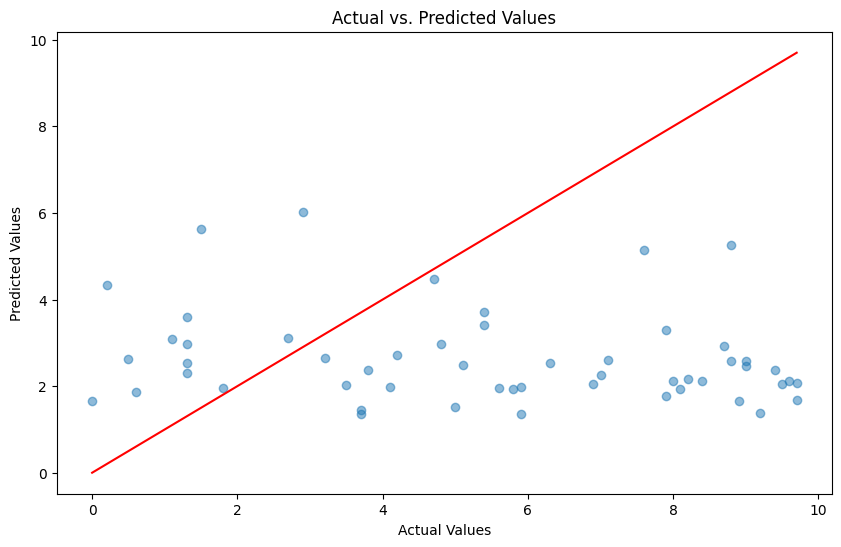

In [15]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [18]:
# Define the Bidirectional RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(Bidirectional(SimpleRNN(128, return_sequences=False)))
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression problems

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use mean squared error loss for regression

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - loss: 24.3259 - val_loss: 12.3346
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - loss: 7.7480 - val_loss: 9.1102
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step - loss: 7.8489 - val_loss: 9.0470
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - loss: 7.0899 - val_loss: 12.5620
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - loss: 6.7329 - val_loss: 9.4660
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - loss: 5.8063 - val_loss: 10.3344
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - loss: 6.0902 - val_loss: 9.9505
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 8s/step - loss: 6.2108 - val_loss: 10.3471
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - loss: 5.3127 - val_loss: 9.9160
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - loss: 5.2611 - val_loss: 10.2119


In [19]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - loss: 10.0649
Test loss: 10.211862564086914
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Mean Absolute Error: 2.733492984411852
R-squared: -0.11068328604564548


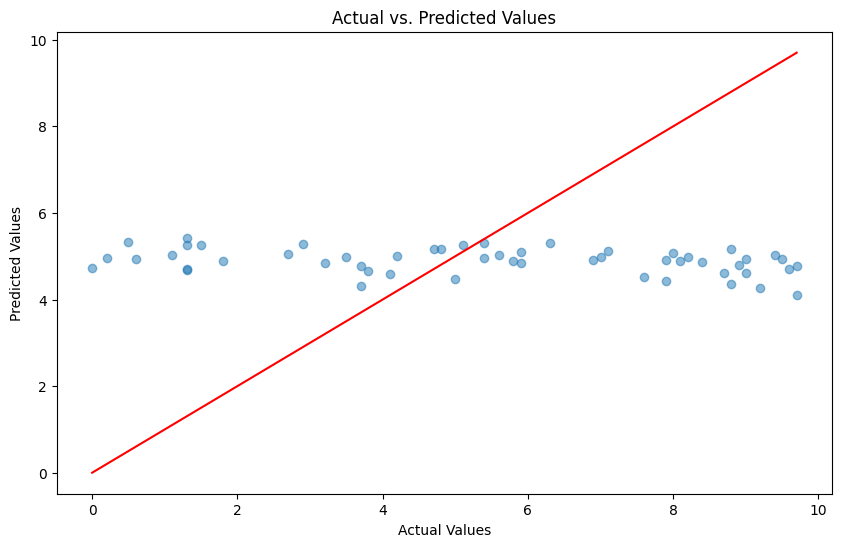

In [20]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [23]:
# Define the Bidirectional GRU model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(Bidirectional(GRU(128, return_sequences=False)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 149s 19s/step - loss: 27.6993 - val_loss: 24.5243
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 134s 19s/step - loss: 13.2886 - val_loss: 10.4460
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 20s/step - loss: 10.0001 - val_loss: 10.7280
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 136s 19s/step - loss: 7.9900 - val_loss: 10.3491
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 143s 19s/step - loss: 7.4955 - val_loss: 9.8280
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 137s 19s/step - loss: 6.7540 - val_loss: 9.6878
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 139s 20s/step - loss: 6.7366 - val_loss: 9.9969
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 139s 20s/step - loss: 5.9195 - val_loss: 10.5085
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 109s 15s/step - loss: 3.6844 - val_loss: 13.0615
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 118s 17s/step - loss: 1.6845 - val_loss: 14.6008


In [24]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 14.2805
Test loss: 14.60084342956543
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020601151BC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 885ms/step
Mean Absolute Error: 3.1918285072974446
R-squared: -0.5805144512699283


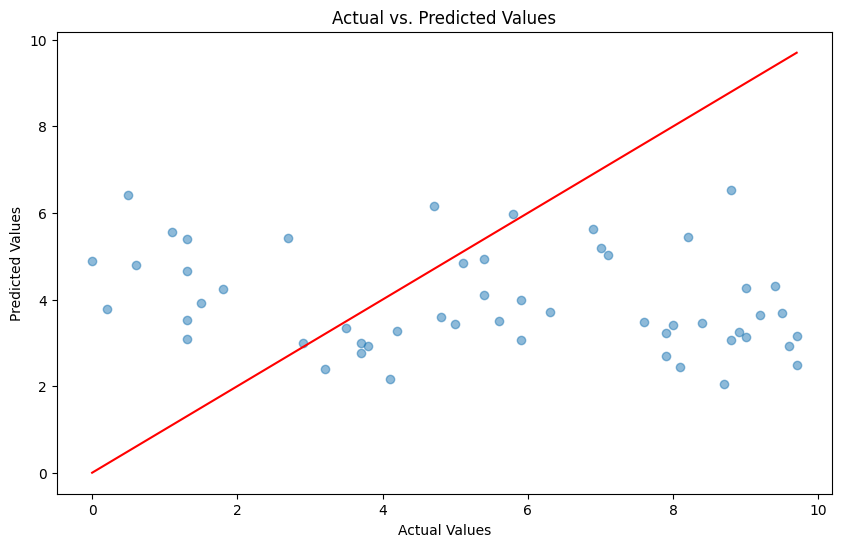

In [25]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [27]:
# Define the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - loss: 24.9389 - val_loss: 11.7377
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - loss: 8.8354 - val_loss: 9.7241
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - loss: 7.8513 - val_loss: 10.3240
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 10s/step - loss: 7.2083 - val_loss: 9.6751
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 70s 10s/step - loss: 7.6482 - val_loss: 9.7631
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 73s 11s/step - loss: 7.1992 - val_loss: 9.6513
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 70s 10s/step - loss: 6.7124 - val_loss: 10.2570
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - loss: 5.2965 - val_loss: 11.9302
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - loss: 4.7970 - val_loss: 12.9339
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - loss: 2.4132 - val_loss: 14.0709


In [28]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step - loss: 13.8295
Test loss: 14.07086181640625
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 916ms/step
Mean Absolute Error: 3.1793766066713154
R-squared: -0.5277493117823826


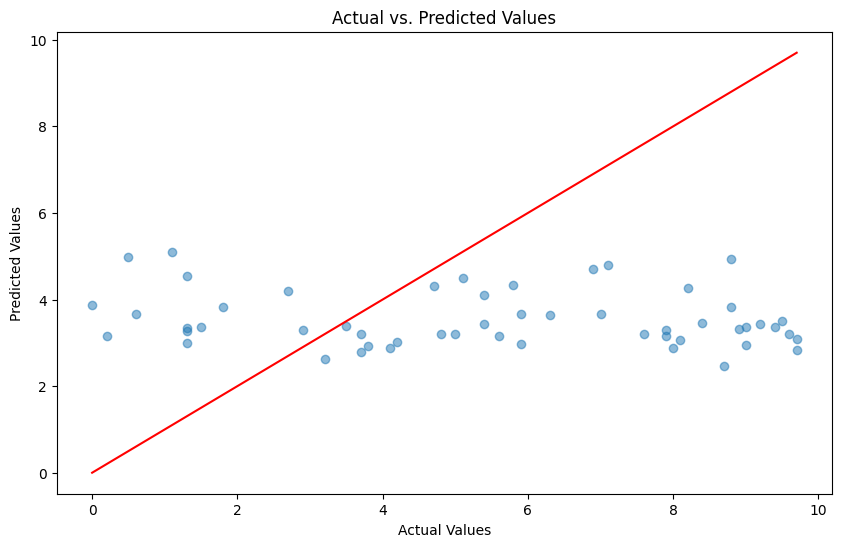

In [29]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

<h1>Model Evaluation Results</h1>

<h2>RNN</h2>
    <p><strong>Test Loss:</strong> 19.9246</p>
    <p><strong>Mean Absolute Error (MAE):</strong> 3.7960</p>
    <p><strong>R-squared:</strong> -1.1568</p>

<h2>Bidirectional RNN</h2>
    <p><strong>Test Loss:</strong> 10.2119</p>
    <p><strong>Mean Absolute Error (MAE):</strong> 2.7335</p>
    <p><strong>R-squared:</strong> -0.1107</p>

<h2>GRU</h2>
    <p><strong>Test Loss:</strong> 14.6008</p>
    <p><strong>Mean Absolute Error (MAE):</strong> 3.1918</p>
    <p><strong>R-squared:</strong> -0.5805</p>

<h2>LSTM</h2>
    <p><strong>Test Loss:</strong> 14.0709</p>
    <p><strong>Mean Absolute Error (MAE):</strong> 3.1794</p>
    <p><strong>R-squared:</strong> -0.5277</p>

<h2>Conclusion</h2>
    <p>Among the four models tested, the Bidirectional RNN performed the best in terms of all evaluation metrics. It achieved the lowest test loss (10.2119) and Mean Absolute Error (2.7335), as well as the highest (least negative) R-squared value (-0.1107).</p>
    <p>The Bidirectional RNN's superior performance indicates that capturing dependencies in both forward and backward directions significantly improves the model's ability to predict the scores accurately.</p>
    <p>The GRU and LSTM models also showed better performance than the basic RNN but were not as effective as the Bidirectional RNN. Both had similar MAE and R-squared values, with the LSTM performing slightly better than the GRU in terms of test loss.</p>
    <p>In summary, the Bidirectional RNN is the most effective model among those tested, followed by the LSTM and GRU, with the basic RNN being the least effective.</p>